In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [6]:
sea_level_data = pd.read_csv("/content/sealevel.csv")
sea_level_data.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


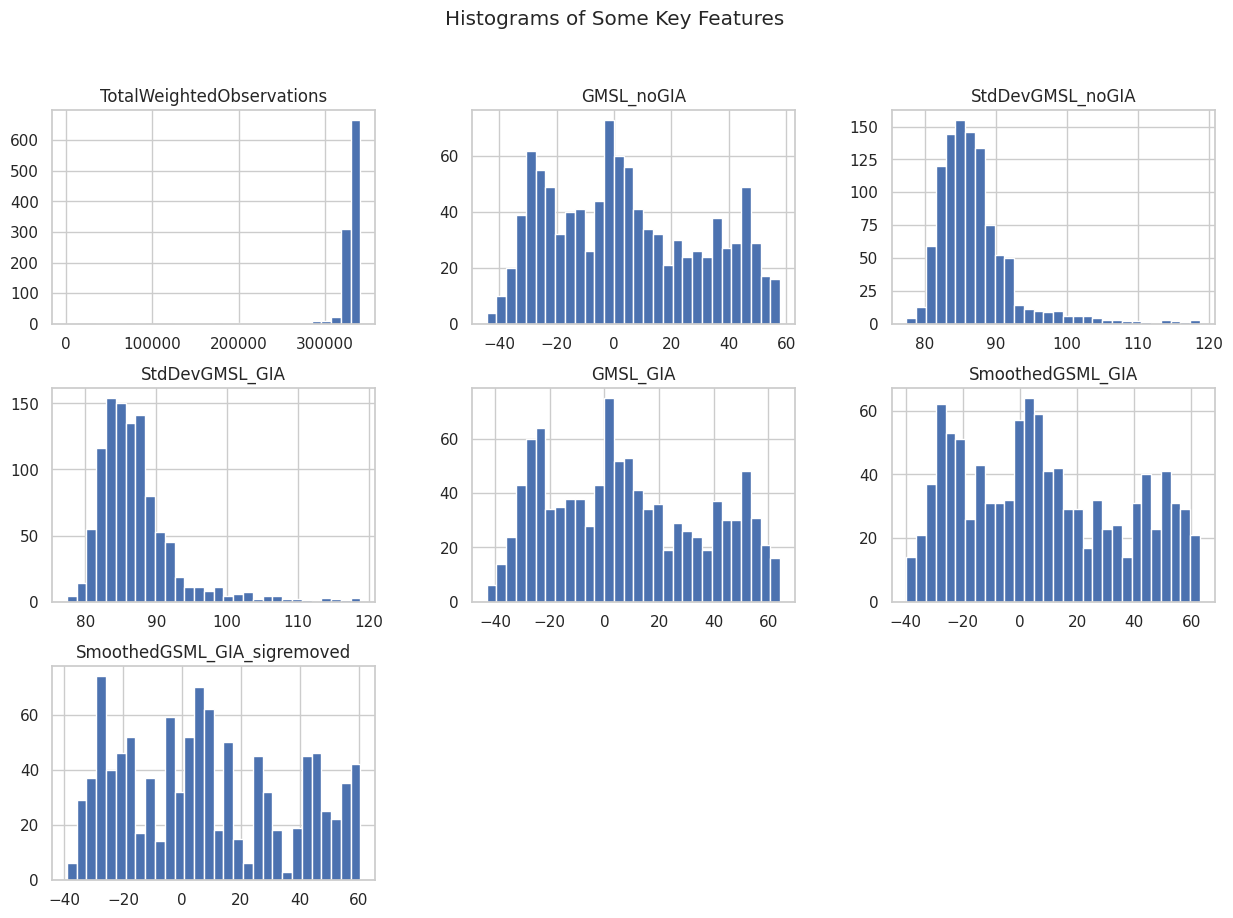

In [8]:
subset_features = ['TotalWeightedObservations', "GMSL_noGIA", 'StdDevGMSL_noGIA', 'StdDevGMSL_GIA', 'GMSL_GIA', 'SmoothedGSML_GIA', 'SmoothedGSML_GIA_sigremoved']
sea_level_data[subset_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Some Key Features')
plt.show()

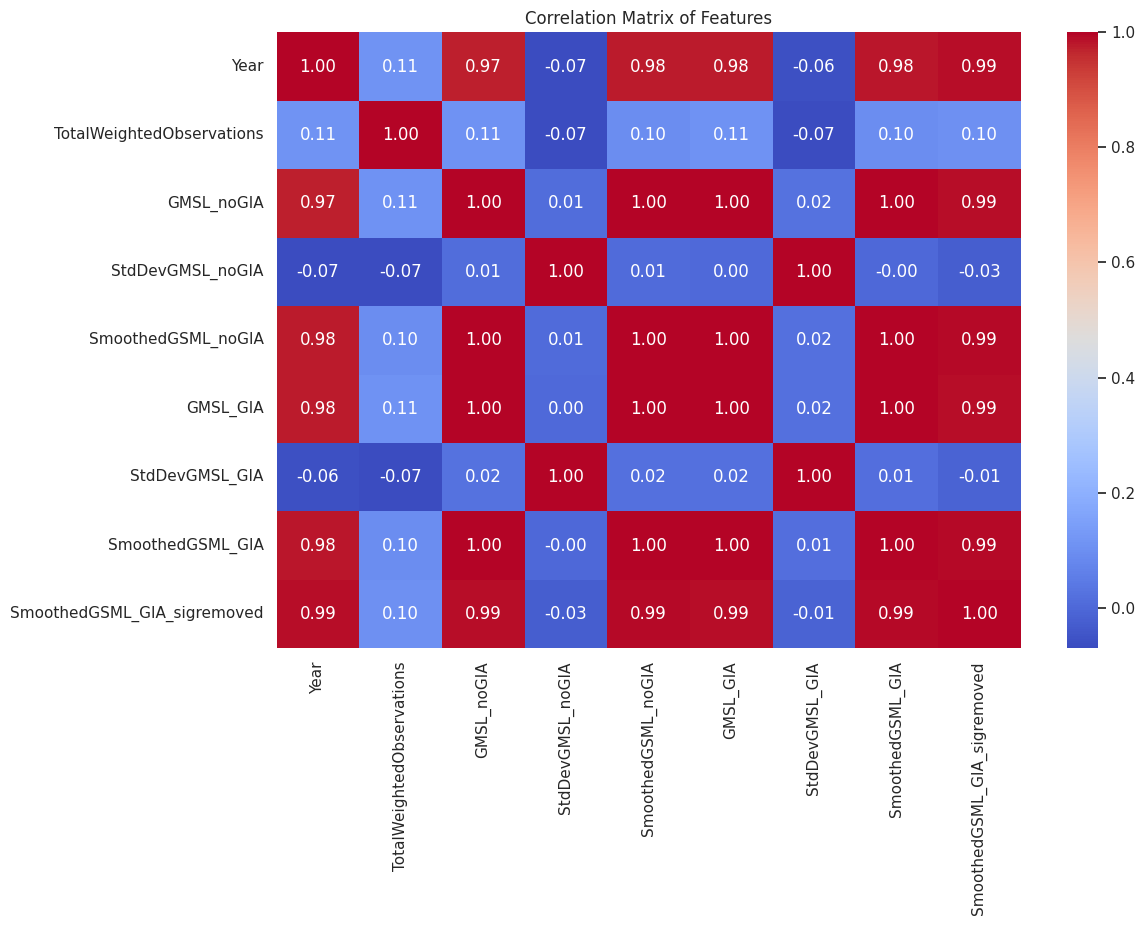

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(sea_level_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

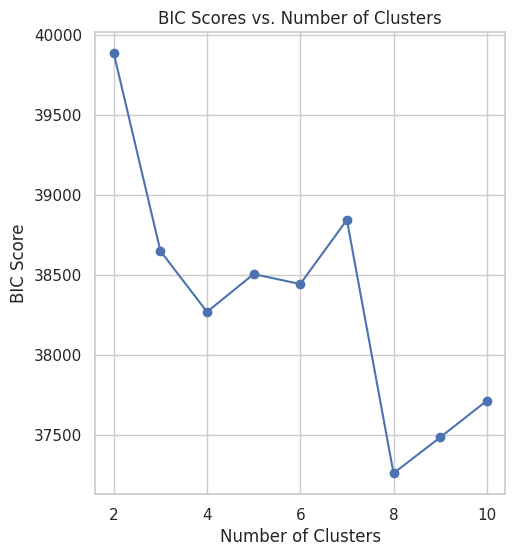

In [12]:

n_clusters = range(2, 11)
bic_scores = []
aic_scores = []
silhouette_scores = []
for n in n_clusters:

    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(sea_level_data)


    labels = gmm.predict(sea_level_data)


    bic_scores.append(gmm.bic(sea_level_data))
    aic_scores.append(gmm.aic(sea_level_data))


    silhouette_avg = silhouette_score(sea_level_data, labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.plot(n_clusters, bic_scores, marker='o')
plt.title('BIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()

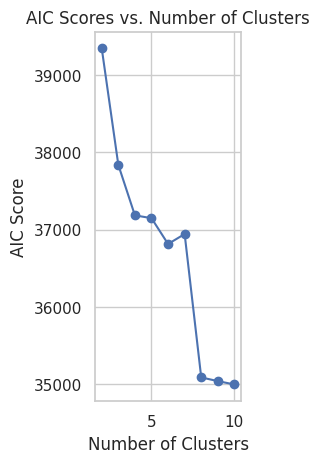

In [13]:
plt.subplot(1, 3, 2)
plt.plot(n_clusters, aic_scores, marker='o')
plt.title('AIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score')
plt.show()

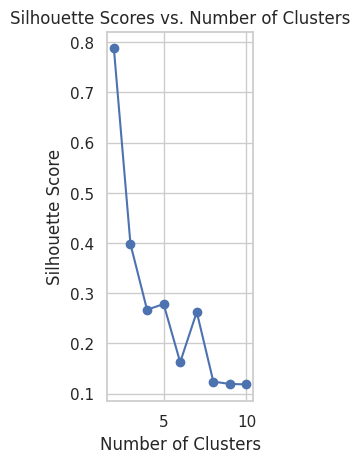

In [14]:
plt.subplot(1, 3, 3)
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

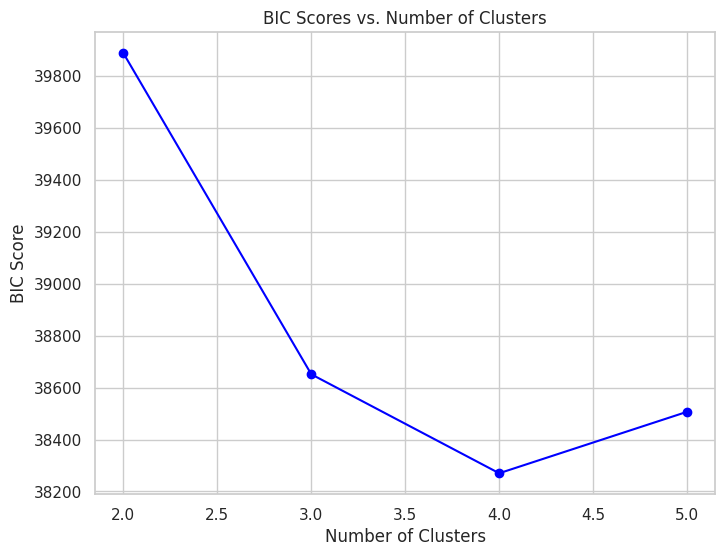

In [15]:
reduced_n_clusters = range(2, 6)

reduced_bic_scores = []
reduced_aic_scores = []

for n in reduced_n_clusters:

    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(sea_level_data)


    reduced_bic_scores.append(gmm.bic(sea_level_data))
    reduced_aic_scores.append(gmm.aic(sea_level_data))

plt.figure(figsize=(8, 6))
plt.plot(reduced_n_clusters, reduced_bic_scores, marker='o', color='blue')
plt.title('BIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()

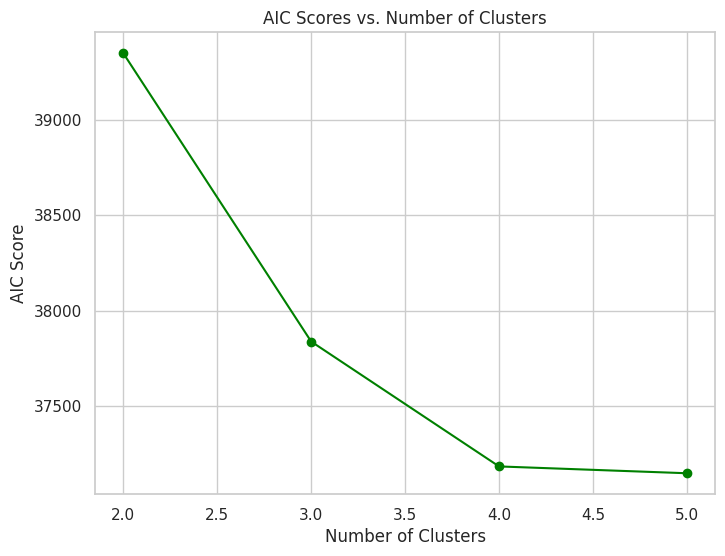

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(reduced_n_clusters, reduced_aic_scores, marker='o', color='green')
plt.title('AIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score')
plt.show()

For 3 clusters, the average silhouette score is : 0.39801502375008013
For 4 clusters, the average silhouette score is : 0.26713138909468614


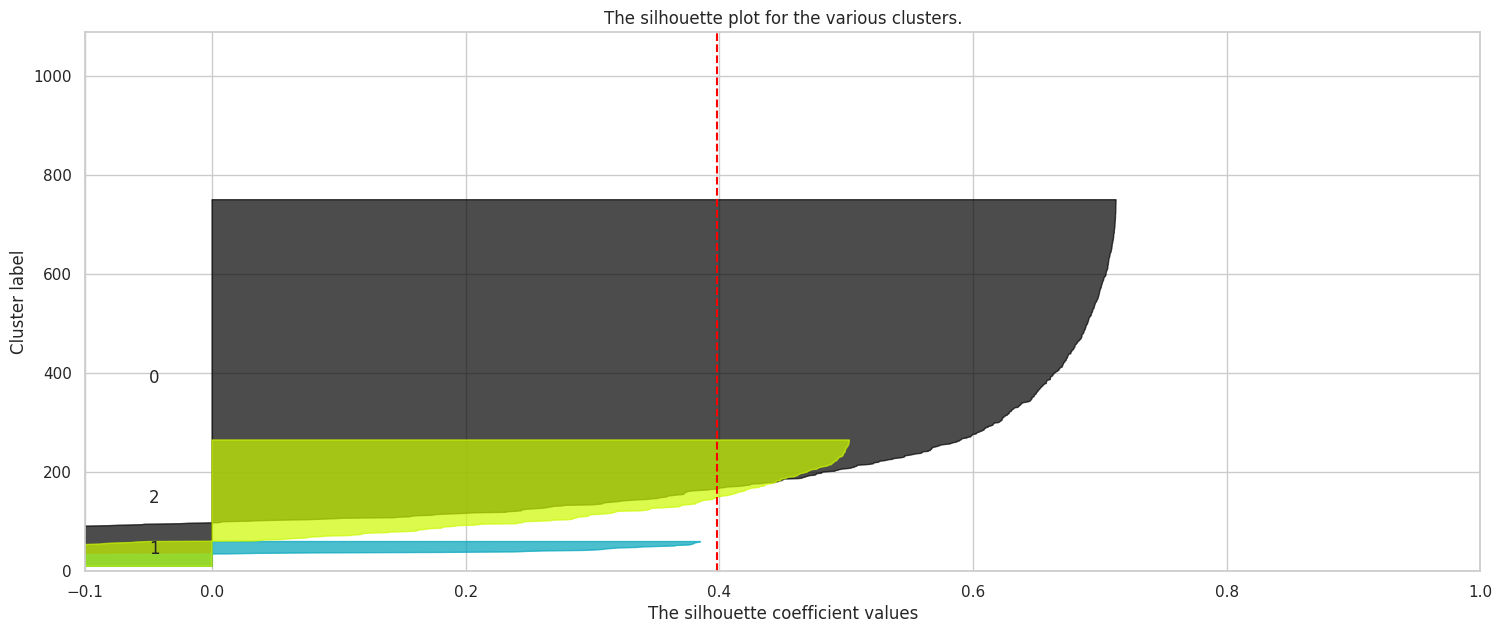

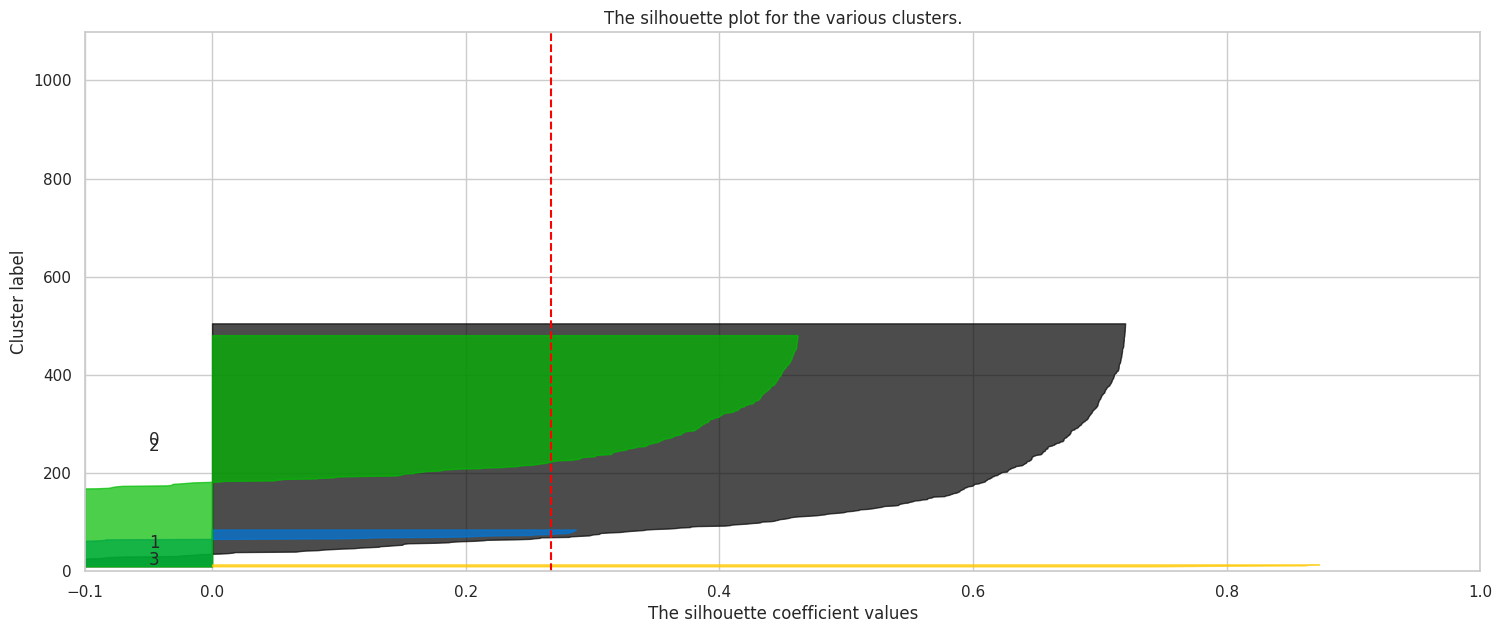

In [17]:


from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def silhouette_plot(data, range_n_clusters):
    for n_clusters in range_n_clusters:
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

        clusterer = GaussianMixture(n_components=n_clusters, random_state=0)
        cluster_labels = clusterer.fit_predict(data)

        silhouette_avg = silhouette_score(data, cluster_labels)
        print(f"For {n_clusters} clusters, the average silhouette score is : {silhouette_avg}")

        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

silhouette_plot(sea_level_data, [3, 4])

In [18]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(sea_level_data)

cluster_labels = gmm.predict(sea_level_data)

clustered_data = sea_level_data.copy()
clustered_data['Cluster'] = cluster_labels

clustered_data.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved,Cluster
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57,2
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11,2
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58,2
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34,1
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21,2


In [19]:
cluster_means = clustered_data.groupby('Cluster').mean()
cluster_means_transposed = cluster_means.T
cluster_means_transposed

Cluster,0,1,2
Year,2010.375169,2006.078431,1996.359375
TotalWeightedObservations,333273.067854,235397.463922,325323.957031
GMSL_noGIA,15.396613,2.775294,-26.101289
StdDevGMSL_noGIA,86.388070,87.098627,88.783125
SmoothedGSML_noGIA,15.371417,3.421961,-25.925937
GMSL_GIA,19.746896,6.094706,-25.161406
StdDevGMSL_GIA,86.463671,87.127647,88.784102
SmoothedGSML_GIA,19.721781,6.724314,-24.986055
SmoothedGSML_GIA_sigremoved,19.742955,6.528039,-24.824961


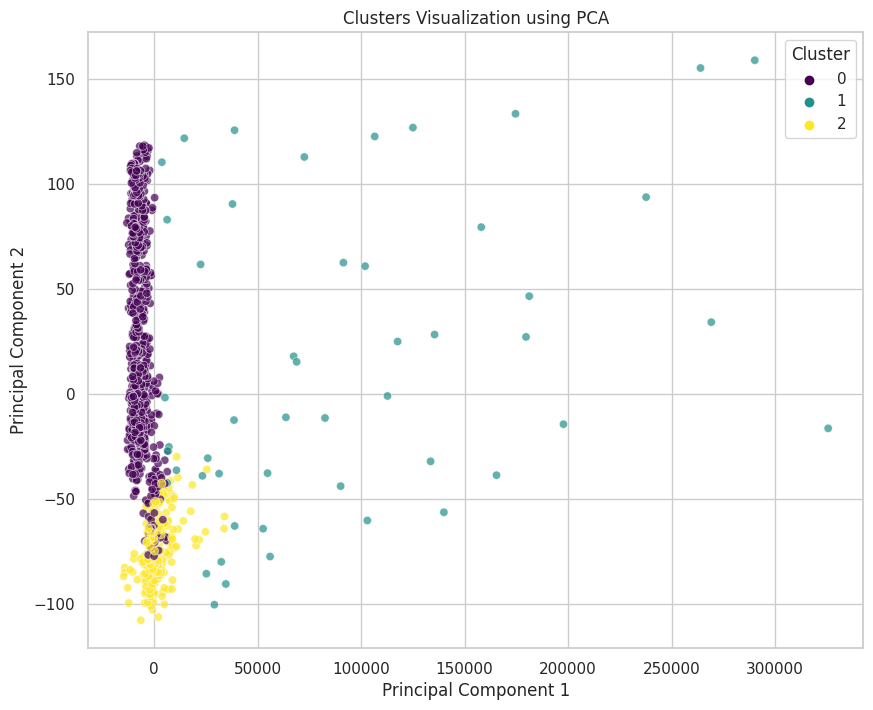

In [20]:


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(sea_level_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.7)
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()